In [1]:
import pandas as pd
from ipynb.fs.full.utils import custom_groupby, get_df, rename_values, replace_values_by_condition
from ipynb.fs.full.plots import heatmap

In [2]:
df = get_df()

In [3]:
df.head(10)

,ID,Status,Duration,D1_Undergraduation,D1_Specialization,D1_Master,D1_Phd,D1_Courses,D1_Others,D2_Country,...,Q15_Model_Deploy_Production_Monitoring,Q16_Model_Monitor_Aspects_Input_And_Output,Q16_Model_Monitor_Aspects_Interpretability_Output,Q16_Model_Monitor_Aspects_Output_And_Decisions,Q16_Model_Monitor_Aspects_Fairness,Q16_Model_Monitor_Aspects_Others,Q16_Model_Monitor_Aspects_Others_Free,Q17_Automated_Machine_Learning_Tools_Yes_No,Q17_Automated_Machine_Learning_Tools_Yes_Free,Origin
2,31,Completed (31),1317,Economics,-99,M.Sc. in Economics,-99,Data Scientist in Datacamp,-99,Brazil,...,-77,not quoted,not quoted,not quoted,not quoted,not quoted,-99,0,-99,https://ww2.unipark.de/uc/seml/
3,34,Completed (31),854,-99,Management,No,No,No,No,Brazil,...,70,not quoted,not quoted,quoted,not quoted,not quoted,-99,No,-99,-99
4,36,Completed (31),1593,Mathematics,Informatics,MSC Computer Science,PhD computer Science,Vários cursos in Coursera,-99,Brazil,...,60,quoted,not quoted,quoted,not quoted,not quoted,-99,"Yes, Please, specify",Own approach,-99
5,57,Completed (31),4238,Computer Science,Data science specialization,-99,-99,-99,-99,Germany,...,100,not quoted,quoted,quoted,not quoted,not quoted,-99,No,-99,-99
6,46,Completed (31),2821,Actuarial Science,Post Graduation in Data Science,M Sc in Data Science -ML models,no Ph D,no other certifications,-99,Brazil,...,80,not quoted,quoted,quoted,not quoted,not quoted,-99,No,-99,-99
7,53,Completed (31),2097,Information System,-99,M.Sc. in Applied Informatics,-99,-99,-99,Brazil,...,30,quoted,quoted,not quoted,not quoted,not quoted,-99,No,-99,-99
8,58,Completed (31),1696,Computer Science,-99,Computer Science,-99,Microsoft Professional Program Data Science & ...,-99,Germany,...,10,quoted,not quoted,not quoted,not quoted,not quoted,-99,No,-99,https://t.co/
9,64,Completed (31),1250,Electrical and Electronics Engineering,-99,M.Sc. in AI and Software Engineering,Computer science,"Azure Associate AI Engineer, Azure Data Scienc...",-99,Sweden,...,0,not quoted,not quoted,not quoted,not quoted,not quoted,-99,No,-99,https://www.linkedin.com/
10,65,Completed (31),106,-99,-99,-99,-99,-99,-99,0,...,-77,not quoted,not quoted,not quoted,not quoted,not quoted,-99,0,-99,-99
11,69,Completed (31),79,-99,-99,-99,-99,-99,-99,0,...,-77,not quoted,not quoted,not quoted,not quoted,not quoted,-99,0,-99,https://ww2.unipark.de/uc/seml/


In [4]:
df[['D13_ML_Programming_Language_C', 'D13_ML_Programming_Language_Java', 'D13_ML_Programming_Language_Javascript',
    'D13_ML_Programming_Language_Julia', 'D13_ML_Programming_Language_MatLab', 'D13_ML_Programming_Language_Python',
    'D13_ML_Programming_Language_R', 'D13_ML_Programming_Language_Others', 'D14_ML_Purpose_Prediction', 
    'D14_ML_Purpose_Prediction_Classification', 'D14_ML_Purpose_Prediction_Association', 
    'D14_ML_Purpose_Prediction_Clustering']].head()

,D13_ML_Programming_Language_C,D13_ML_Programming_Language_Java,D13_ML_Programming_Language_Javascript,D13_ML_Programming_Language_Julia,D13_ML_Programming_Language_MatLab,D13_ML_Programming_Language_Python,D13_ML_Programming_Language_R,D13_ML_Programming_Language_Others,D14_ML_Purpose_Prediction,D14_ML_Purpose_Prediction_Classification,D14_ML_Purpose_Prediction_Association,D14_ML_Purpose_Prediction_Clustering
2,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,quoted,not quoted,not quoted,not quoted
3,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted
4,quoted,not quoted,not quoted,not quoted,not quoted,quoted,quoted,not quoted,quoted,quoted,not quoted,quoted
5,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,quoted,not quoted,quoted
6,not quoted,quoted,not quoted,not quoted,not quoted,quoted,quoted,not quoted,quoted,quoted,not quoted,quoted


In [5]:
problems_mapping = {
    'D14_ML_Purpose_Prediction': 'Prediction',
    'D14_ML_Purpose_Prediction_Classification': 'Classification',
    'D14_ML_Purpose_Prediction_Association': 'Association',
    'D14_ML_Purpose_Prediction_Clustering': 'Clustering'
}

language_mapping = {
    'D13_ML_Programming_Language_C': 'C/C++',
    'D13_ML_Programming_Language_Java': 'Java',
    'D13_ML_Programming_Language_Javascript': 'Javascript',
    'D13_ML_Programming_Language_Julia': 'Julia',
    'D13_ML_Programming_Language_MatLab': 'MatLab',
    'D13_ML_Programming_Language_Python': 'Python',
    'D13_ML_Programming_Language_R': 'R',
    'D13_ML_Programming_Language_Others': 'Others'
}

In [6]:
problems = []
languages = []
problem_language = []
for index, row in df.iterrows():
    for p in problems_mapping:
        for l in language_mapping:
            # formatted name for algorithm
            problems.append(problems_mapping[p])
            # what did the guy who answered an specific framework about agility
            languages.append(language_mapping[l])
            # match
            if row[p] == 'not quoted':
                # algorithm is not appliable for this language
                problem_language.append(0)
            elif row[p] == 'quoted':
                # algorithm was quoted, so we need to check if the current language also was
                if row[l] == 'not quoted':
                    problem_language.append(0)
                elif row[l] == 'quoted':
                    # only case that we really have a match
                    problem_language.append(1)

In [8]:
# create a custom dataframe to handle only the columns that we want
d13_14_df = pd.DataFrame()
d13_14_df['Problem'] = problems
d13_14_df['Language'] = languages
d13_14_df['Answers'] = problem_language

In [9]:
d13_14_df = d13_14_df.groupby(['Problem', 'Language']).sum().reset_index()

In [10]:
d13_14_df

,Problem,Language,Answers
0,Association,C/C++,8
1,Association,Java,11
2,Association,Javascript,7
3,Association,Julia,1
4,Association,MatLab,6
5,Association,Others,7
6,Association,Python,25
7,Association,R,10
8,Classification,C/C++,32
9,Classification,Java,34


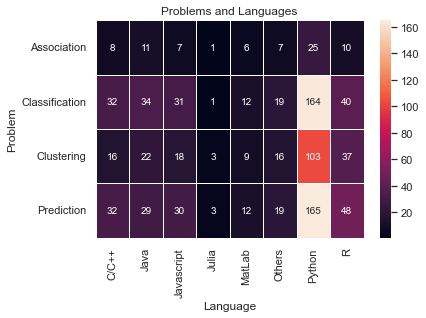

In [11]:
heatmap(d13_14_df, 'Problem', 'Language', 'Answers', title='Problems and Languages')